In [115]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm

import statistics as stat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from itertools import *
try:
    import itertools.izip as zip
except ImportError:
    import itertools

In [123]:
df = pd.read_csv("./ABCD.csv")

In [124]:
df["selection"]=[i>0 for i in df['S']]
df["selection"]

0      True
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10     True
11     True
12     True
13    False
14     True
15    False
16    False
17    False
Name: selection, dtype: bool

In [125]:
df["paper"] = pd.Categorical(df["Paper"])
df["paper"]


0     Kaznatcheev2019
1     Kaznatcheev2019
2     Kaznatcheev2019
3     Kaznatcheev2019
4          Maltas2023
5          Maltas2023
6          Maltas2023
7          Maltas2023
8      Faroukkian2020
9      Faroukkian2020
10     Faroukkian2020
11     Faroukkian2020
12     Faroukkian2020
13    VulicKolter2001
14        CaiChan2020
15               Chao
16    Li.Traulsen2015
17                NaN
Name: paper, dtype: category
Categories (7, object): ['CaiChan2020', 'Chao', 'Faroukkian2020', 'Kaznatcheev2019', 'Li.Traulsen2015', 'Maltas2023', 'VulicKolter2001']

In [126]:
paper_dict = {'Kaznatcheev2019':'green', 'Maltas2023':'orange', 'Faroukkian2020':u'magenta', 'CaiChan2020':'brown',"VulicKolter2001":u"gray", "Li.Traulsen2015":u"cyan"}
col_paper = list()
cols_S = list()

for i in df['paper']:
    if i in paper_dict.keys(): 
        col_paper.append(paper_dict[i])
    else:
        col_paper.append("black")


for i in df['S']:
    if i>0:
        cols_S.append("blue")
    else:
        cols_S.append("green")
    

In [127]:
df['col_paper'] =col_paper 
df["color_S"]=cols_S
df['C-A'] = df['C']-df['A']
df['B-D'] = df['B']-df['D']


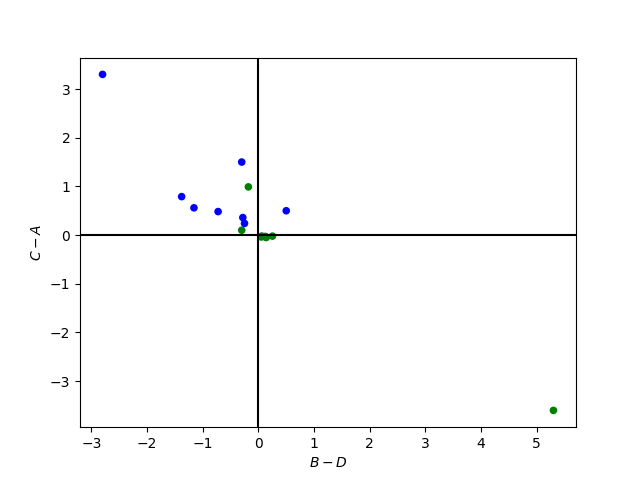

In [128]:
df.plot.scatter(x="B-D", y="C-A", c="color_S")
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.xlabel(r"$B-D$")
plt.ylabel(r"$C-A$")
plt.savefig("Experimental_CA_BD.png")

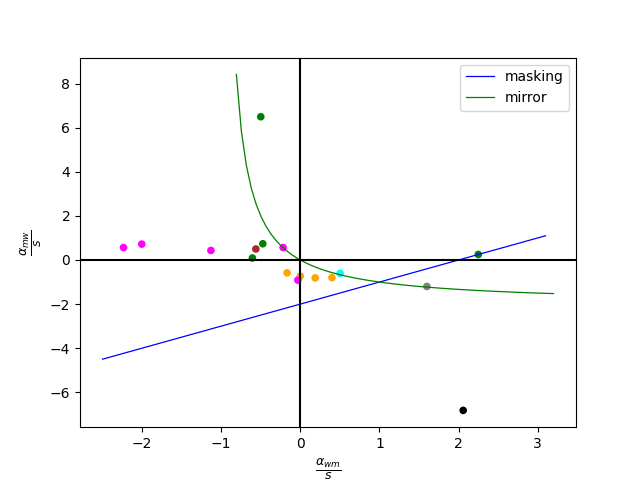

In [152]:
amw = np.linspace(-3, 3.2, 100) #a_mw
amw_mask = np.linspace(-4.5, 1.1, 100) #a_mw
awm_neg = np.linspace(-6, 3, 50) #a_mw
s_pos = np.linspace(0.01,3,50)
s_neg = np.linspace(-3,0.01,50)

# Mirroring
awm_mi = amw 
amw_mi = -2*awm_mi/(awm_mi+1)

#Masking

#a_wm/s = a_mw/s + 2
awm = amw_mask + 2


df.plot.scatter(x="awm_s", y="amw_s", c="col_paper")

plt.plot(awm, amw_mask, 'b', lw=0.9, label ='masking')
plt.plot(awm_mi[35:100], amw_mi[35:100], 'g', lw=0.9, label ='mirror')

plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.xlabel(r"$\frac{\alpha_{wm}}{s}$", size=13)
plt.ylabel(r"$\frac{\alpha_{mw}}{s}$",size=13)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
#plt.legend(markers, paper_dict.keys(), numpoints=1)

plt.savefig("Experimental_divideS_lines.png", dpi=360)

In [107]:
mu=0.01
df['mask_awm']= df["a_mw"]+2*df['S']
df['mirror'] = df['S']*(2+df['S'])
df['maintain_awm']=df['a_mw']*mu/(df['S']*(1+df['S']))
df['maintain_awm']=-df['a_wm']*df['S']/(mu*(1+df['S']))

In [108]:
df[["Paper", "S","mask_awm","a_wm",'mirror','a_mw','maintain_awm']]

,Paper,S,mask_awm,a_wm,mirror,a_mw,maintain_awm
0,Kaznatcheev2019,0.1538,0.3461,0.3462,0.331254,0.0385,-4.614800
1,Kaznatcheev2019,0.0800,0.6800,-0.0400,0.166400,0.5200,0.296296
2,Kaznatcheev2019,3.8000,10.4000,-1.8000,22.040000,2.8000,142.500000
3,Kaznatcheev2019,-1.4348,-3.0000,0.8696,-0.810949,-0.1304,-286.960000
4,Maltas2023,-0.1600,-0.1900,-0.0300,-0.294400,0.1300,-0.571429
5,Maltas2023,-0.0971,-0.1165,-0.0388,-0.184772,0.0777,-0.417264
6,Maltas2023,-0.1200,-0.1700,0.0200,-0.225600,0.0700,0.272727
7,Maltas2023,-0.1089,-0.1386,0.0000,-0.205941,0.0792,0.000000
8,Faroukkian2020,-0.2455,-0.2669,0.0077,-0.430730,0.2241,0.250543
9,Faroukkian2020,0.4894,1.2554,-0.1064,1.218312,0.2766,3.496184


awm_mt_s1

No handles with labels found to put in legend.


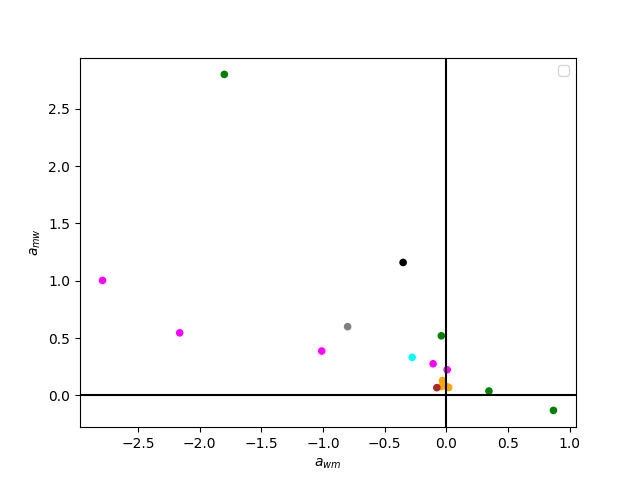

In [134]:
x = np.linspace(-3, 3, 50)
y = x -2*s5
y2 = x + 2*s1


df.plot.scatter(x="a_wm", y="a_mw", c="col_paper")
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
#plt.plot(awm_mt_pos, amw, 'y', lw=2, label ='s>0')
#plt.plot(amw, awm_mt_neg, 'r', lw=2, label ='s<0')
#plt.plot(y2, x, 'b', lw=2, label ='s<0')
#plt.plot(awm_mimic[0:15], amw[0:15],'b',lw=2, label ='s<0')
#plt.plot(awm_mimic[20:50], amw[20:50],'b',lw=2, label ='s<0')

plt.xlabel(r"$a_{wm}$")
plt.ylabel(r"$a_{mw}$")
plt.savefig("Experimental.png")

plt.legend()

No handles with labels found to put in legend.


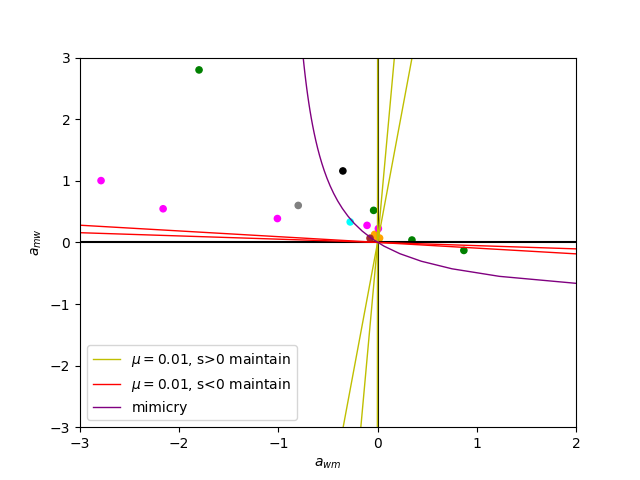

In [163]:
amw = awm = np.linspace(-3, 3, 50) #a_mw
awm_neg = np.linspace(-3, 3, 50) #a_mw
s_pos = np.linspace(0.01,3,50)
s_neg = np.linspace(-3,0.01,50)

# Maintenance
mu = 0.01
s0=s= df['S'][0]
awm_mt_pos0 = amw*mu/(s*(1+s))
s1=s= df['S'][1]
awm_mt_pos = amw*mu/(s*(1+s))
s2=s= df['S'][2]
awm_mt_pos2 = amw*mu/(s*(1+s))

s4=s= df['S'][4] 
amw_mt_neg = awm*(1+s)*mu/(s)
s5=s= df['S'][5] 
amw_mt_neg2 = awm*(1+s)*mu/(s)


awm_mimic = -amw/(1+amw)

x = np.linspace(-3, 3, 50)
y = x -2*s5
y2 = x + 2*s1

df.plot.scatter(x="a_wm", y="a_mw", c="col_paper")
plt.legend()
plt.axhline(0, c='black') ; plt.axvline(0,c='black')
plt.plot(awm_mt_pos0[0:50], amw[0:50], 'y', lw=1, label =r'$\mu=0.01$, s>0 maintain')
plt.plot(awm_mt_pos[0:50], amw[0:50], 'y', lw=1, label =r'$\mu=0.01$, s>0 maintain')
plt.plot(awm_mt_pos2[0:50], amw[0:50], 'y', lw=1, label =r'$\mu=0.01$, s>0 maintain')
plt.plot(awm[0:50],amw_mt_neg[0:50],  'r', lw=1, label =r'$\mu=0.01$, s<0 maintain')
plt.plot(awm[0:50],amw_mt_neg2[0:50],  'r', lw=1, label =r'$\mu=0.01$, s<0 maintain')
#plt.plot(awm_mirror[0:50], amw_mirror[0:50],c='cyan', lw=1, label ='mirroring')
#plt.plot(awm_mirror_n[30:50], amw_mirror_n[30:50],c='cyan', lw=1, label ='mirroring')

#plt.plot(y2, x, 'b', lw=1, label ='masking')
#plt.plot(awm_mimic[0:15], amw[0:15],'b',lw=2, label ='s<0')
plt.plot(awm_mimic[18:50], amw[18:50],c='purple',lw=1, label ='mimicry')

plt.xlim(-3,2)
plt.ylim(-3,3)
plt.xlabel(r"$a_{wm}$")
plt.ylabel(r"$a_{mw}$")

cats = df['paper'].unique()
plt.legend(paper_dict)

# The following two lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in paper_dict.values()]
plt.legend(markers, paper_dict.keys(), numpoints=1)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.savefig("Experimental_awm_amw.png", dpi=360)


## 3D plotting

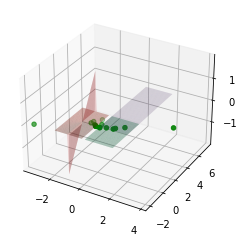

In [39]:
#%matplotlib inline


In [8]:
%matplotlib widget

In [59]:
plt.close("all")

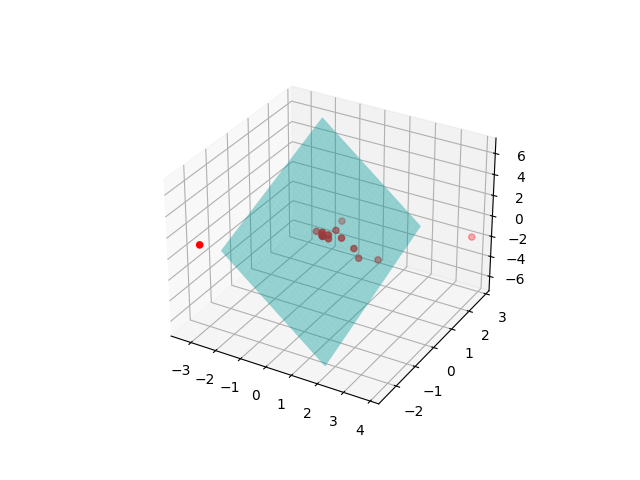

In [36]:
#Masking

from mpl_toolkits import mplot3d
mu=0.01

fig = plt.figure()
ax = plt.axes(projection='3d')
s_ = np.linspace(-2,2,20)
amw_ = np.linspace(-2.5,2.5,40)


xx, yy = np.meshgrid(s_, amw_) #s,amw
z_mask= yy-2*xx#awm
# plot the surface
ax.plot_surface(xx, yy, z_mask, alpha=0.4, color='cyan')

# Ensure that the next plot doesn't overwrite the first plot
#ax = plt.gca()
#ax.hold(True)

ax.scatter3D(df['S'], df['a_mw'], df['a_wm'], color='red')

In [ ]:
#ax.plot_surface(xx2, yy2, z2_maintain, alpha=0.2)
#ax.plot_surface(xx3, z_mirror,yy3, alpha=0.4, color="yellow")
xx2, yy2 = np.meshgrid(-s_, amw_) #s,amw
xx3, yy3 = np.meshgrid(s_, s_*(2+s_))#s,amw
 

z2_maintain = -xx2*yy2/(mu*(1+xx2))
z_mirror = -xx3*(2+xx3)/(1+xx3)


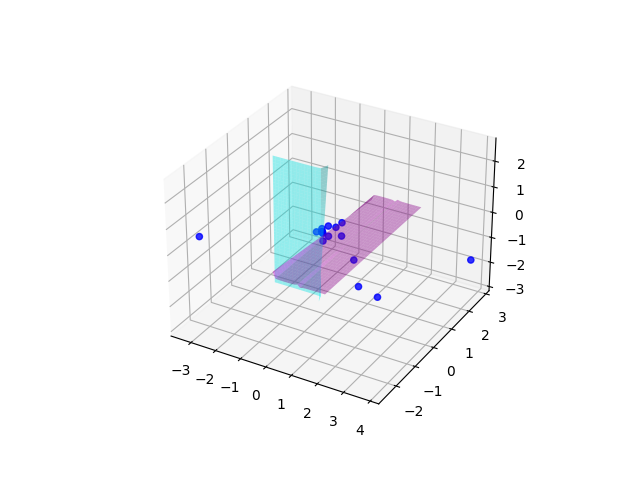

In [62]:
# Maintaining 

mu=0.001

fig = plt.figure()
ax = plt.axes(projection='3d')
s = np.linspace(-2,-0.01,20)
sneg = -s
amw_ = np.linspace(-2.5,2.5,40)

# s>0
z_maintain = mu*yy/(xx*(1+xx))
xx, yy = np.meshgrid(-s, amw_) #s,amw
ax.plot_surface(xx, yy, z_maintain, alpha=0.4, color="magenta")

#s<0
awm = np.linspace(-2.5,2.5,40)
xx, yy = np.meshgrid(s, awm) #s,amw
z_maintain = -mu*(1+xx)*yy/xx

# plot the surface
ax.plot_surface(xx, z_maintain, yy, alpha=0.4, color='cyan')

# Ensure that the next plot doesn't overwrite the first plot
#ax = plt.gca()
#ax.hold(True)

ax.scatter3D(df['S'], df['a_mw'], df['a_wm'], color="blue",alpha=0.8)

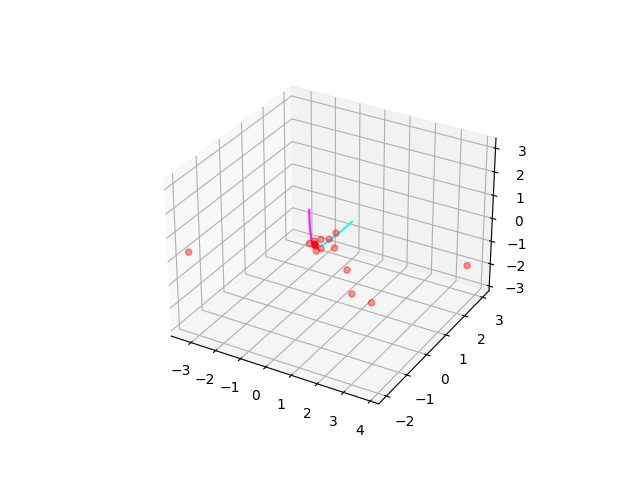

In [57]:
# Mirroring

mu=0.001

fig = plt.figure()
ax = plt.axes(projection='3d')
sneg = np.linspace(-1,-0.05,20)
s = -sneg
awm_ = s*(2+s)
amw_ = -s*(2+s)/(1+s)

# s>0

xs, ymw = np.meshgrid(s, amw_) #s,amw
ax.plot3D(s, amw_, awm_, alpha=0.9, color="magenta")

# s<0 
ax.plot3D(-s, awm_, amw_, alpha=0.9, color="cyan")


ax.scatter3D(df['S'], df['a_mw'], df['a_wm'], color='red', alpha=0.4)

In [ ]:
# Mirroring

mu=0.001

fig = plt.figure()
ax = plt.axes(projection='3d')
sneg = np.linspace(-1,-0.05,20)
s = -sneg
awm_ = s*(2+s)
amw_ = -s*(2+s)/(1+s)

# s>0

xs, ymw = np.meshgrid(s, amw_) #s,amw
ax.plot3D(s, amw_, awm_, alpha=0.9, color="magenta")

# s<0 
ax.plot3D(-s, awm_, amw_, alpha=0.9, color="cyan")


ax.scatter3D(df['S'], df['a_mw'], df['a_wm'], color='red', alpha=0.4)